# Importing the required Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# TASK 1 Reading the data

In [2]:
df = pd.read_csv('DS1_C9_S3_Practice_MedicalPremium_Data.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

# TASK 2: Missing value treatment and outlier analysis

In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Diabetes'),
  Text(2, 0, 'BloodPressureProblems'),
  Text(3, 0, 'AnyTransplants'),
  Text(4, 0, 'AnyChronicDiseases'),
  Text(5, 0, 'Height'),
  Text(6, 0, 'Weight'),
  Text(7, 0, 'KnownAllergies'),
  Text(8, 0, 'HistoryOfCancerInFamily'),
  Text(9, 0, 'NumberOfMajorSurgeries'),
  Text(10, 0, 'PremiumPrice')])

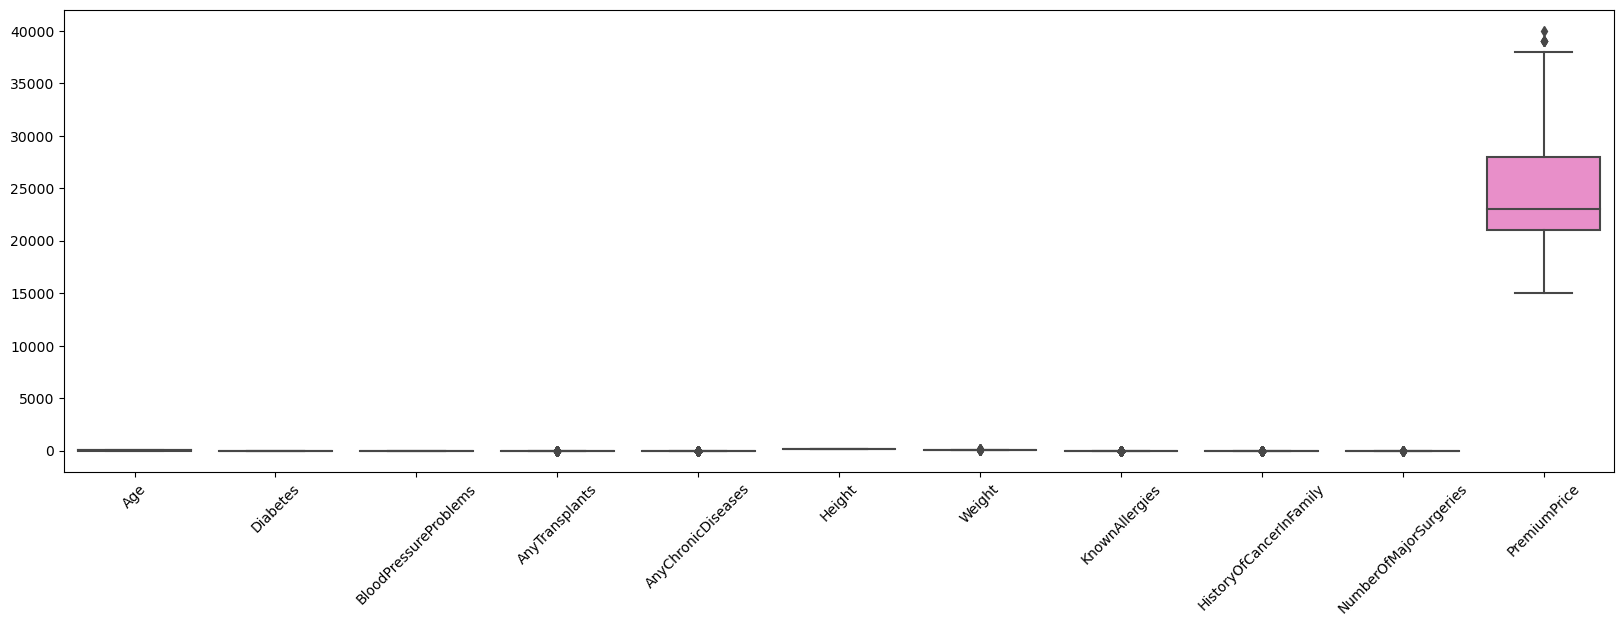

In [6]:
sns.boxplot(data=df)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation=45)

In [7]:
def iqr_winsorization(df, thresh=1.5):
    df_out = df.copy()  # Create a copy to avoid modifying original data
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        # Calculate IQR
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define fences
        lower_fence = Q1 - thresh * IQR
        upper_fence = Q3 + thresh * IQR

        # Winsorize outliers
        df_out.loc[df_out[col] < lower_fence, col] = lower_fence
        df_out.loc[df_out[col] > upper_fence, col] = upper_fence

    return df_out

df = pd.DataFrame(df)
# Perform outlier treatment on all columns
df_treated = iqr_winsorization(df.copy())
print(df_treated)

      Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0    45.0       0.0                    0.0               0   
1    60.0       1.0                    0.0               0   
2    36.0       1.0                    1.0               0   
3    52.0       1.0                    1.0               0   
4    38.0       0.0                    0.0               0   
..    ...       ...                    ...             ...   
981  18.0       0.0                    0.0               0   
982  64.0       1.0                    1.0               0   
983  56.0       0.0                    1.0               0   
984  47.0       1.0                    1.0               0   
985  21.0       0.0                    0.0               0   

     AnyChronicDiseases  Height  Weight  KnownAllergies  \
0                     0   155.0      57               0   
1                     0   180.0      73               0   
2                     0   158.0      59               0   
3                  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Diabetes'),
  Text(2, 0, 'BloodPressureProblems'),
  Text(3, 0, 'AnyTransplants'),
  Text(4, 0, 'AnyChronicDiseases'),
  Text(5, 0, 'Height'),
  Text(6, 0, 'Weight'),
  Text(7, 0, 'KnownAllergies'),
  Text(8, 0, 'HistoryOfCancerInFamily'),
  Text(9, 0, 'NumberOfMajorSurgeries'),
  Text(10, 0, 'PremiumPrice')])

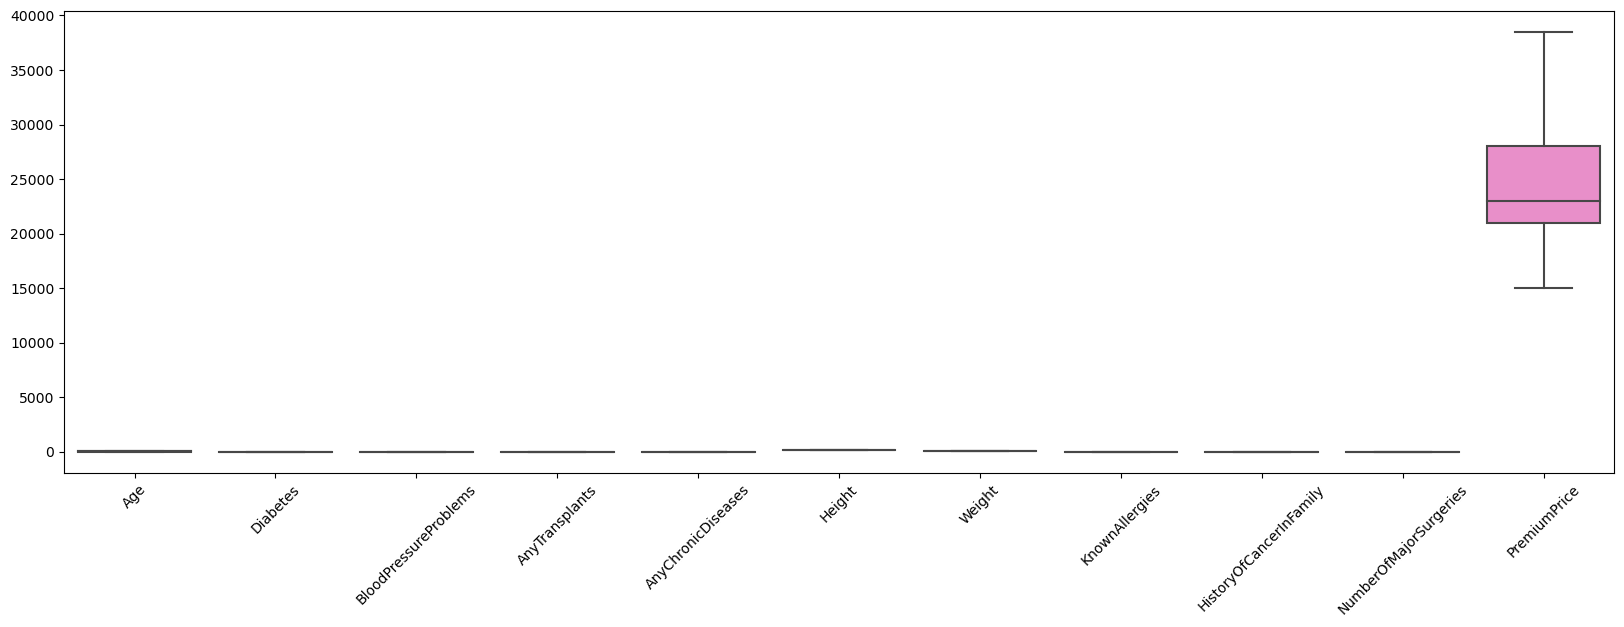

In [8]:
sns.boxplot(data=df_treated)
plt.gcf().set_size_inches(20,6)
plt.xticks(rotation=45)

# Data Scaling

In [9]:
cols = df_treated.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_treated)
df_scaled = pd.DataFrame(df_scaled, columns=cols)
df_scaled.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,0.233197,-0.850750,-0.938978,0.0,0.0,-1.306105,-1.425307,0.0,0.0,-0.90820,0.107023
1,1.307981,1.175433,-0.938978,0.0,0.0,1.170852,-0.276146,0.0,0.0,-0.90820,0.748509
2,-0.411674,1.175433,1.064988,0.0,0.0,-1.008870,-1.281662,0.0,0.0,0.46947,-0.213720
3,0.734763,1.175433,1.064988,0.0,0.0,1.468086,1.160307,0.0,0.0,1.84714,0.588137
4,-0.268369,-0.850750,-0.938978,0.0,0.0,-0.216244,0.801194,0.0,0.0,0.46947,-0.213720


In [10]:
# Extract the last row index
last_row_index = len(df_scaled) - 1  # Get the length (number of rows) and subtract 1 for last index

# Extract the last row using iloc and store in a new DataFrame
new_data = df_scaled.iloc[last_row_index]  # Select row using index

# Reshape the extracted Series into a DataFrame (optional)
new_data_df = new_data.to_frame().transpose()  # Convert Series to single-row DataFrame

In [11]:
df_scaled = df_scaled.iloc[:-1]  # Slicing with exclusive upper bound

# Checking for multi-collinearity

In [12]:
# Selecting the cutoff value as 0.7
abs(df_scaled.corr())>=0.7

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,True,False,False,False,False,False,False,False,False,False,False
Diabetes,False,True,False,False,False,False,False,False,False,False,False
BloodPressureProblems,False,False,True,False,False,False,False,False,False,False,False
AnyTransplants,False,False,False,False,False,False,False,False,False,False,False
AnyChronicDiseases,False,False,False,False,False,False,False,False,False,False,False
Height,False,False,False,False,False,True,False,False,False,False,False
Weight,False,False,False,False,False,False,True,False,False,False,False
KnownAllergies,False,False,False,False,False,False,False,False,False,False,False
HistoryOfCancerInFamily,False,False,False,False,False,False,False,False,False,False,False
NumberOfMajorSurgeries,False,False,False,False,False,False,False,False,False,True,False


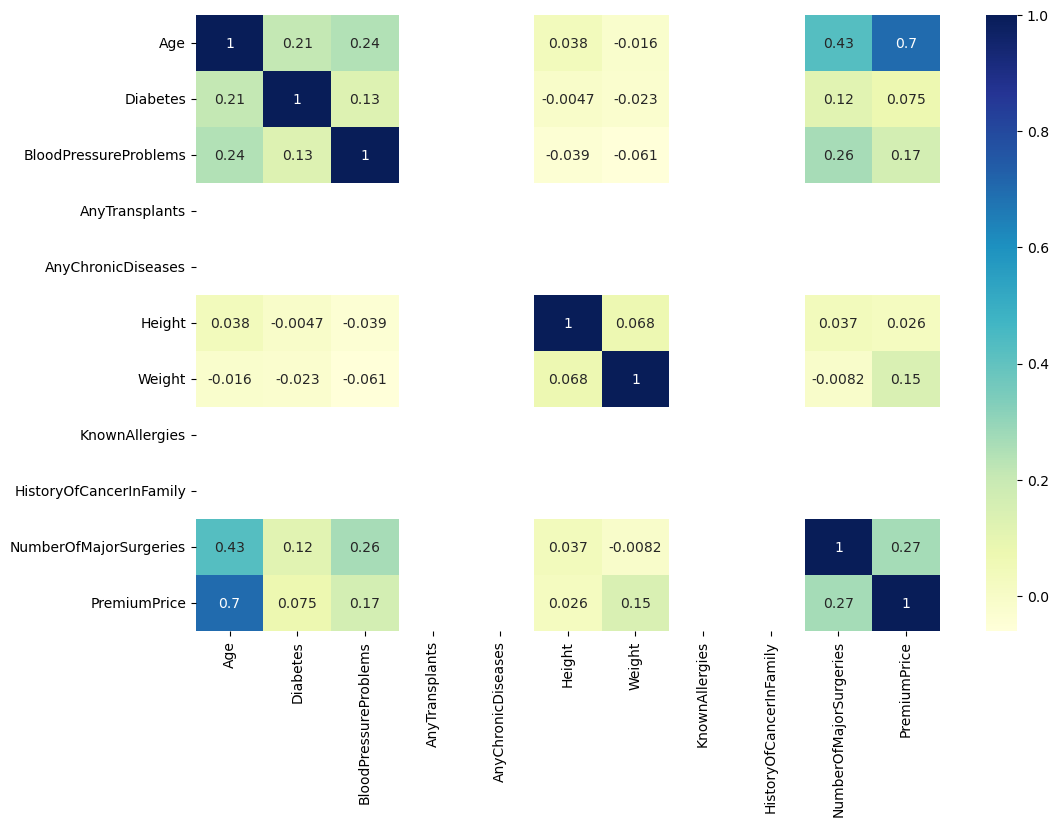

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.heatmap(df_scaled.corr(), annot=True, cmap="YlGnBu")

In [14]:
sorted_corr=df_scaled.corr()[['PremiumPrice']].sort_values(by='PremiumPrice', ascending=False)
sorted_corr

,PremiumPrice
PremiumPrice,1.000000
Age,0.697943
NumberOfMajorSurgeries,0.267087
BloodPressureProblems,0.165657
Weight,0.145362
Diabetes,0.075040
Height,0.025899
AnyTransplants,NaN
AnyChronicDiseases,NaN
KnownAllergies,NaN


# TASK 3
1. One feature: 'Age'
It has the highest correlation value with the dependent variable.
Data Splitting, training, and predicting the model¶

In [15]:
X1=np.array(df_scaled['Age']).reshape((-1, 1))
y=np.array(df_scaled['PremiumPrice'])

In [16]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y,test_size=0.3,random_state=200)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1=s_model1.score(X_train1, y_train1)
y_pred1 = s_model1.predict(X_test1)

In [17]:
print('Intercept: \n', s_model1.intercept_)
print('slope:', s_model1.coef_)

Intercept: 
 0.0028767064367974347
slope: [0.72276984]


Evaluating the model performance¶

In [18]:
MSE1=mean_squared_error(y_test1, y_pred1)
MAE1=mean_absolute_error(y_test1,y_pred1)
RMSE1 = mean_squared_error(y_test1, y_pred1, squared=False)
print('MSE = ', MSE1)
print('RMSE = ', RMSE1)
print('MAE = ', MAE1)
# R2 Score
r2_1 = r2_score(y_test1, y_pred1)
print(f"The R2 score of the model is", r2_1)

MSE =  0.5059460812828441
RMSE =  0.7112988691702273
MAE =  0.4983820377763028
The R2 score of the model is 0.44710385879255177


# 2. Two features: 'Age' and 'Weight'

In [19]:
# Two features
X2 = df_scaled[['Age', 'Weight']].values.reshape(-1,2)


Splitting data and training model

In [20]:
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y,test_size=0.3,random_state=200)
model_mul1 = LinearRegression().fit(X_train2, y_train2)

print('Intercept: \n', model_mul1.intercept_)
print('slope:', model_mul1.coef_)

Intercept: 
 0.0030833556115116264
slope: [0.72294419 0.16428654]


Evaluating the model performance

In [21]:
MSE2=mean_squared_error(y_test2, model_mul1.predict(X_test2))
RMSE2 = mean_squared_error(y_test2, model_mul1.predict(X_test2), squared=False)
MAE2= mean_absolute_error(y_test2, model_mul1.predict(X_test2))
print('MSE = ', MSE2)
print('RMSE = ', RMSE2)
print('MAE = ', MAE2)
# R2 Score
r2_2 = r2_score(y_test2, model_mul1.predict(X_test2))
print(f"The R2 score of the model is", r2_2)

MSE =  0.4879178112683921
RMSE =  0.6985111389723088
MAE =  0.49307709597686167
The R2 score of the model is 0.4668050903909128


Interpretation
By adding the 'Weight' feature, R2 has been increased which means the model is improving.¶

# 3. Three features: 'Age','Weight', and 'Diabetes'

In [22]:
# Three features
X3 = df_scaled[['Age', 'Weight', 'Diabetes']].values.reshape(-1,3)

In [23]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X3,y,test_size=0.3,random_state=200)
model_mul2 = LinearRegression().fit(X_train3, y_train3)


print('Intercept: \n', model_mul2.intercept_)
print('slope:', model_mul2.coef_)




Intercept: 
 0.004415527045437398
slope: [ 0.73489898  0.163743   -0.0529664 ]


In [24]:
MSE3=mean_squared_error(y_test3, model_mul2.predict(X_test3))
RMSE3 = mean_squared_error(y_test3, model_mul2.predict(X_test3), squared=False)
MAE3= mean_absolute_error(y_test3, model_mul2.predict(X_test3))
print('MSE = ', MSE3)
print('RMSE = ', RMSE3)
print('MAE = ', MAE3)
# R2 Score
r2_3 = r2_score(y_test3, model_mul2.predict(X_test3))
print(f"The R2 score of the model is", r2_3)


MSE =  0.47914643106672566
RMSE =  0.6922040386090835
MAE =  0.48653805472668177
The R2 score of the model is 0.47639042457171776


# TASK 4

Interpretation:  
After adding the 3rd feature 'Diabetes':
The value of R2 is increased from 0.46 to 0.47.

The 3rd feature 'Diabetes' can be considered as its contribution in improving the model.

# TASK 5

In [25]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [26]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    #print(df_results)
    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residual plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.show()  

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


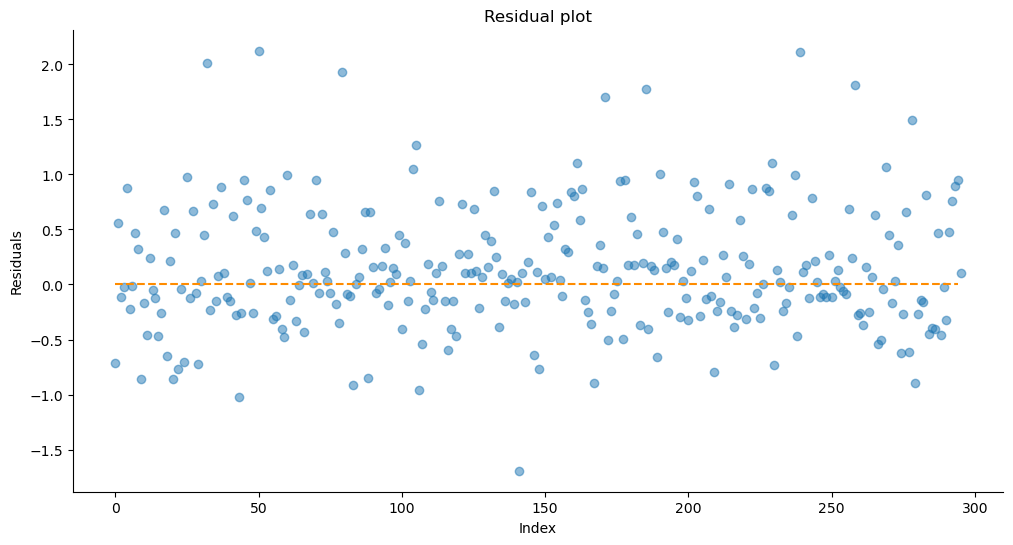

In [27]:
homoscedasticity_assumption(model_mul2, X_test3, y_test3)

Interpretation: We observe a fairly even spread of residuals both above and below the zero line across all indices, so there is some evidence of homoscedasticity

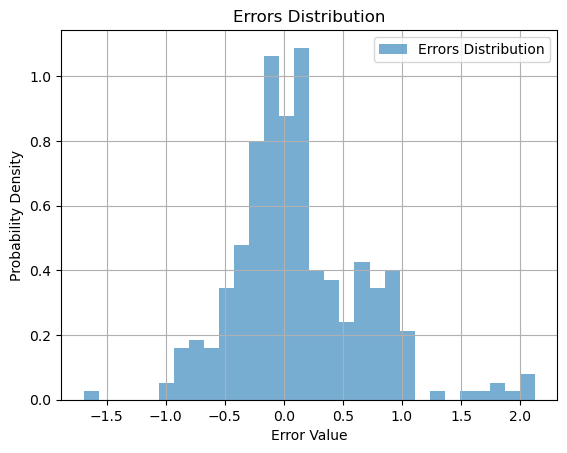

In [28]:
df_results = calculate_residuals(model_mul2, X_test3, y_test3)
plt.hist(df_results.Residuals, density=True, bins=30, alpha=0.6, label='Errors Distribution')  # Plot errors histogram
plt.xlabel('Error Value')
plt.ylabel('Probability Density')
plt.title('Errors Distribution')
plt.legend()
plt.grid(True)
plt.show()

Interpretation: Error distribution curve shows normality in nature.

# Predicting new data

In [29]:
# Reshape the new data into a 2D array for prediction
new_data_array = np.reshape(new_data_df[['Age', 'Weight', 'Diabetes']], (1, -1))

In [30]:
# Predict the target value for the new data
predicted_value = model_mul2.predict(new_data_array)

# Print the predicted value
print("Predicted value for the new data:", predicted_value[0])

Predicted value for the new data: -1.0646157084410792


In [31]:
# Original value of the new data
new_data_df['PremiumPrice']

985   -1.496692
Name: PremiumPrice, dtype: float64

# TASK 6

# Moderate Error with Improvement over Single-Variable Model:

MSE (Mean Squared Error) = 0.47: This value indicates a lower error compared to the previous model you might have shared (assuming MSE was 0.4879). A lower MSE suggests the model makes predictions that are closer to the actual PremiumPrice on average.

MAE (Mean Absolute Error) = 0.48: Similar to MSE, this is lower than a potential previous MAE of 0.49, indicating a reduction in the average absolute difference between predicted and actual PremiumPrice.

RMSE (Root Mean Squared Error) = 0.692: The RMSE is lower than the possible previous value of 0.698, signifying a decrease in the average magnitude of the errors in PremiumPrice prediction.

# Improved Correlation:
R-Squared (R²) = 0.476: This value is higher than the potential previous R-Squared of 0.466, suggesting a significant improvement.  

Overall Interpretation:

This multiple linear regression model shows better performance compared to a potential single-variable model using only Age. The errors (MSE, MAE, RMSE) have decreased, indicating more accurate PremiumPrice predictions on average. The R-Squared value has also increased significantly, suggesting that incorporating Age, Weight, Diabetes together explains a larger portion of the temperature variation.

# In conclusion:
This multiple linear regression model demonstrates a clear improvement in PremiumPrice prediction accuracy and captures a larger portion of the influencing factors compared to a potential single-variable model also meets required assumptions.

Y = 0.0044 + 0.73 * X1 + 0.16 * X2 - 0.05 * X3 